# Feature Importance Plot - Cattle

First feature important scores for all four models are imported, merged, and then plotted. Values are ordered based on the best model (i.e., CatBoost).

In [17]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # show all columns in output

# set working directory
os.chdir('C:/Users/Marion Späth/Desktop/ADS/Thesis/Data/ML_training')

# load train and test data (previously created in the ElasticNet notebook)
catboost = pd.read_csv("feature_importance_catboost_cattle_TRUST.csv")
en = pd.read_csv("feature_importance_elastic_net_cattle_TRUST.csv")
rf = pd.read_csv("feature_importance_randomforest_cattle_TRUST.csv")
svm = pd.read_csv("feature_importance_svm_cattle_TRUST.csv")

en["Model"] = "Elastic Net"
catboost["Model"] = "CatBoost"
rf["Model"] = "Random Forest"
svm["Model"] = "SVM"

svm.head(2)

,feature,importance,Model
0,Afm Language,0.000000,SVM
1,Irrigated Land,0.001212,SVM


In [18]:
# merge
feature_imp = pd.concat([catboost, en, rf, svm], ignore_index=True)
feature_imp

,feature,importance,Model
0,Afm Language,0.000000,CatBoost
1,Amh Language,0.000000,CatBoost
2,Adult's Education,0.000860,CatBoost
3,Irrigated Land,0.002600,CatBoost
4,Expend,0.002991,CatBoost
...,...,...,...
79,Trust in VIP,0.041636,SVM
80,Main Information Source,0.055025,SVM
81,Child's Activity,0.058145,SVM
82,Reason Non-Purchase,0.068750,SVM


In [19]:
# Step 1: Filter CatBoost data
catboost_top = feature_imp[feature_imp["Model"] == "CatBoost"].sort_values(
    by="importance", ascending=False
)

# Step 2: Extract top N features based on CatBoost
top_n =50
catboost_top_features = catboost_top["feature"].head(top_n).tolist()

# Step 3: Filter main DataFrame for only those features
top_features_ordered = feature_imp[feature_imp["feature"].isin(catboost_top_features)]

# Step 4: Set feature order for plotting
feature_order = catboost_top_features[::-1]  # reverse for top-down plot
feature_order

['Afm Language',
 'Amh Language',
 "Adult's Education",
 'Irrigated Land',
 'Expend',
 'English Language',
 "Child's Education",
 'Household Moved',
 'Knows VIP',
 'Owns Phone',
 'Age (z)',
 'Number of Adults in HH (z)',
 "Child's Activity",
 'Trust in VIP',
 'Number of Minors in HH (z)',
 'Owns Agricultural Land',
 'Main Information Source',
 'Religion',
 'Household Status',
 'Reason Non-Purchase',
 'Trust in VIP, Comp. Score (z)']

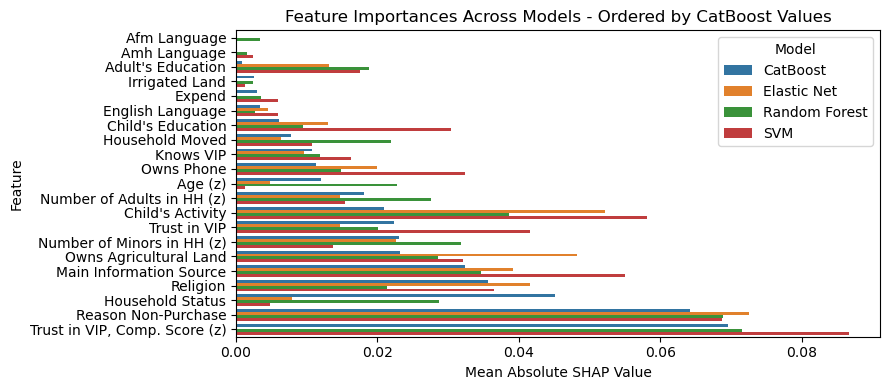

In [20]:

# Step 5: Plot
plt.figure(figsize=(9, 4))
sns.barplot(
    data=top_features_ordered,
    x="importance",
    y="feature",
    hue="Model",
    dodge=True,
    order=feature_order
)
plt.title("Feature Importances Across Models - Ordered by CatBoost Values")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


# Feature Importance Plot - Goat

First feature important scores for all four models are imported, merged, and then plotted. Values are ordered based on the best model (i.e., SVM).

In [8]:
# load train and test data (previously created in the ElasticNet notebook)
catboost = pd.read_csv("feature_importance_catboost_goat_TRUST.csv")
en = pd.read_csv("feature_importance_elastic_net_goat_TRUST.csv")
rf = pd.read_csv("feature_importance_randomforest_goat_TRUST.csv")
svm = pd.read_csv("feature_importance_svm_goat_TRUST.csv")

en["Model"] = "Elastic Net"
catboost["Model"] = "CatBoost"
rf["Model"] = "Random Forest"
svm["Model"] = "SVM"

feature_imp = pd.concat([catboost, en, rf, svm], ignore_index=True)
feature_imp.head(50)

,feature,importance,Model
0,Afm Language,0.000000,CatBoost
1,English Language,0.000000,CatBoost
2,Child's Activity,0.000000,CatBoost
3,Amh Language,0.000138,CatBoost
4,Adult's Education,0.001647,CatBoost
5,Irrigated Land,0.002060,CatBoost
6,Religion,0.003718,CatBoost
7,Child's Education,0.003888,CatBoost
8,Owns Phone,0.005872,CatBoost
9,Expend,0.006315,CatBoost


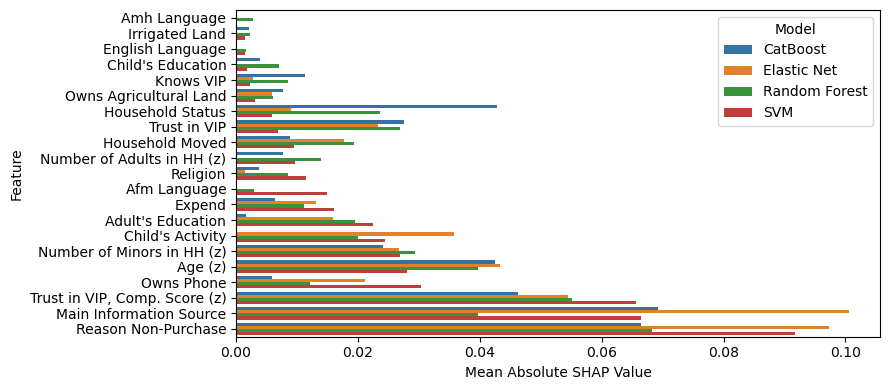

In [9]:
# Step 1: Filter SVM data
SVM_top = feature_imp[feature_imp["Model"] == "SVM"].sort_values(
    by="importance", ascending=False
)

# Step 2: Extract top N features based on SVM
top_n =50
SVM_top_features = SVM_top["feature"].head(top_n).tolist()

# Step 3: Filter main DataFrame for only those features
top_features_ordered = feature_imp[feature_imp["feature"].isin(SVM_top_features)]

# Step 4: Set feature order for plotting
feature_order = SVM_top_features[::-1]  # reverse for top-down plot

# Step 5: Plot
plt.figure(figsize=(9,4))
sns.barplot(
    data=top_features_ordered,
    x="importance",
    y="feature",
    hue="Model",
    dodge=True,
    order=feature_order
)
#plt.title("Feature Importances Across Models - Ordered by SVM Values")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.legend(title="Model")
plt.tight_layout()
plt.show()